## 연속형 변수 다 사용

In [27]:
import pandas as pd
berry_0 = pd.read_csv("C:/Users/user/Desktop/빅콘테스트/STRAWBERRY_FRUIT_SETTING_ENV_20221209.csv")
print (berry_0.head())
# 원본 파일 불러오기

   ZONE_NM          STRG_DT  FRST_TREE_CNT  RTTN_PUMP_OPRT_YN_4  \
0       66  2022/01/01 0:00            5.0                    0   
1       66  2022/01/01 0:10            5.0                    0   
2       66  2022/01/01 0:20            5.0                    0   
3       66  2022/01/01 0:30            5.0                    0   
4       66  2022/01/01 0:40            5.0                    0   

   RTTN_PUMP_OPRT_YN_3  RTTN_PUMP_OPRT_YN_2  RTTN_PUMP_OPRT_YN_1  \
0                    0                    1                    1   
1                    0                    1                    1   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   CLR_OPRT_YN_5  CLR_OPRT_YN_4  CLR_OPRT_YN_3  ...  SKLT_OPDR_RATE_1_LEFT  \
0              0              0              0  ...                      0   
1              0              0 

In [28]:
# 상관관계 보고 추린 필요한 변수들만 가져오기
berry_1= berry_0[["PFBS_NTRO_CBDX_CTRN","EXTN_TPRT","DWP_TPRT","WNDRC","ABSLT_HMDT","WDSP"
,"STRTN_WATER","EXTN_SRQT","WATER_LACK_VL","EXTN_ACCMLT_QOFLG","SPL_TPRT_1","HTNG_TPRT_1","VNTILAT_TPRT_5"
,"VNTILAT_TPRT_4","VNTILAT_TPRT_3","TRWVLV_OPDR_RATE_2","TRWVLV_OPDR_RATE_1","HRZNT_SCRN_OPDR_RATE_2"
,"HRZNT_SCRN_OPDR_RATE_1","VNTILAT_TPRT_1","SPL_TPRT_2","INNER_TPRT_1","INNER_TPRT_2","AVE_INNER_TPRT_1_2","INNER_HMDT_1",
"INNER_HMDT_2","AVE_INNER_HMDT_1_2","CBDX_STNG_VL","SKLT_OPDR_RATE_1_RIGHT","SKLT_OPDR_RATE_1_LEFT",'FRST_TREE_CNT']]
print (berry_1.head())

   PFBS_NTRO_CBDX_CTRN  EXTN_TPRT  DWP_TPRT  WNDRC  ABSLT_HMDT  WDSP  \
0                  456       -2.2       8.5    193         8.3   2.6   
1                  459       -2.2       9.0    205         8.6   3.0   
2                  468       -2.2       9.1    198         8.6   3.0   
3                  466       -2.3       9.2    213         8.7   2.6   
4                  467       -2.3       9.2    193         8.7   3.3   

   STRTN_WATER  EXTN_SRQT  WATER_LACK_VL  EXTN_ACCMLT_QOFLG  ...  \
0          9.2          0            0.9                962  ...   
1          9.4          0            0.8                962  ...   
2          9.5          0            0.9                962  ...   
3          9.4          0            0.7                962  ...   
4          9.3          0            0.6                962  ...   

   INNER_TPRT_1  INNER_TPRT_2  AVE_INNER_TPRT_1_2  INNER_HMDT_1  INNER_HMDT_2  \
0          10.0           7.8                 8.9          90.4          93.5

In [29]:
x= berry_1.drop("FRST_TREE_CNT",axis=1).values
y= berry_1["FRST_TREE_CNT"].values
print(x)
print(y)

[[456.   -2.2   8.5 ... 550.    0.    0. ]
 [459.   -2.2   9.  ... 550.    0.    0. ]
 [468.   -2.2   9.1 ... 550.    0.    0. ]
 ...
 [423.   24.9  24.1 ...   0.   40.    0. ]
 [427.   24.6  24.  ...   0.   40.    0. ]
 [431.   25.   24.1 ...   0.   40.    0. ]]
[5.  5.  5.  ... 0.5 0.5 0.5]


In [30]:
from sklearn.linear_model import Lasso

import matplotlib.pyplot as plt

names =berry_1.drop("FRST_TREE_CNT",axis=1).columns

print(names)

Index(['PFBS_NTRO_CBDX_CTRN', 'EXTN_TPRT', 'DWP_TPRT', 'WNDRC', 'ABSLT_HMDT',
       'WDSP', 'STRTN_WATER', 'EXTN_SRQT', 'WATER_LACK_VL',
       'EXTN_ACCMLT_QOFLG', 'SPL_TPRT_1', 'HTNG_TPRT_1', 'VNTILAT_TPRT_5',
       'VNTILAT_TPRT_4', 'VNTILAT_TPRT_3', 'TRWVLV_OPDR_RATE_2',
       'TRWVLV_OPDR_RATE_1', 'HRZNT_SCRN_OPDR_RATE_2',
       'HRZNT_SCRN_OPDR_RATE_1', 'VNTILAT_TPRT_1', 'SPL_TPRT_2',
       'INNER_TPRT_1', 'INNER_TPRT_2', 'AVE_INNER_TPRT_1_2', 'INNER_HMDT_1',
       'INNER_HMDT_2', 'AVE_INNER_HMDT_1_2', 'CBDX_STNG_VL',
       'SKLT_OPDR_RATE_1_RIGHT', 'SKLT_OPDR_RATE_1_LEFT'],
      dtype='object')


In [31]:
split_index = int(len(berry_1) * 0.8)
x_train = x[:split_index]
y_train = y[:split_index]
x_test = x[split_index:]
y_test = y[split_index:]

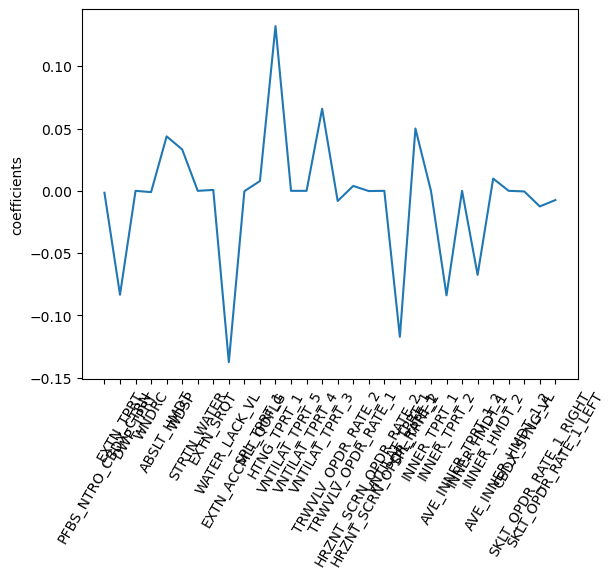

In [32]:
lasso= Lasso(alpha=0.1)
lasso_coef=lasso.fit(x_train,y_train).coef_

_=plt.plot(range(len(names)),lasso_coef)

_=plt.xticks(range(len(names)),names,rotation=60)

_=plt.ylabel("coefficients")

plt.show()

In [33]:
from sklearn.metrics import mean_squared_error
# 테스트 세트에 대한 예측
y_pred = lasso.predict(x_test)

# 평균 제곱 오차 계산
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.0516391441313724


In [34]:
import numpy as np
# Lasso 모델의 계수와 변수명 가져오기
coefficients = lasso.coef_


# 계수 크기의 절댓값에 따라 정렬한 인덱스 가져오기
sorted_idx = np.argsort(np.abs(coefficients))[::-1]

# 정렬된 계수와 변수명 출력
for i in sorted_idx:
    coef = coefficients[i]
    col_name = names[i]
    print(f"변수명: {col_name}, 계수: {coef}")

변수명: WATER_LACK_VL, 계수: -0.1375542771825951
변수명: HTNG_TPRT_1, 계수: 0.1322438454455885
변수명: VNTILAT_TPRT_1, 계수: -0.11722192236112283
변수명: INNER_TPRT_2, 계수: -0.08387514216249944
변수명: EXTN_TPRT, 계수: -0.08338333170142018
변수명: INNER_HMDT_1, 계수: -0.06750188827511494
변수명: VNTILAT_TPRT_3, 계수: 0.06590105343023132
변수명: SPL_TPRT_2, 계수: 0.05004334726327948
변수명: ABSLT_HMDT, 계수: 0.04373507535794943
변수명: WDSP, 계수: 0.033236450068866344
변수명: SKLT_OPDR_RATE_1_RIGHT, 계수: -0.012535597508675304
변수명: INNER_HMDT_2, 계수: 0.009847596431758136
변수명: TRWVLV_OPDR_RATE_2, 계수: -0.008155810222555147
변수명: SPL_TPRT_1, 계수: 0.007882565200213645
변수명: SKLT_OPDR_RATE_1_LEFT, 계수: -0.00740834867750117
변수명: TRWVLV_OPDR_RATE_1, 계수: 0.003942932562758762
변수명: PFBS_NTRO_CBDX_CTRN, 계수: -0.0015377726671014459
변수명: WNDRC, 계수: -0.0010358920402109785
변수명: EXTN_SRQT, 계수: 0.0007187573309236069
변수명: CBDX_STNG_VL, 계수: -0.00047905262983027533
변수명: EXTN_ACCMLT_QOFLG, 계수: -0.00031137900264849
변수명: HRZNT_SCRN_OPDR_RATE_2, 계수: -0.0001793621332200

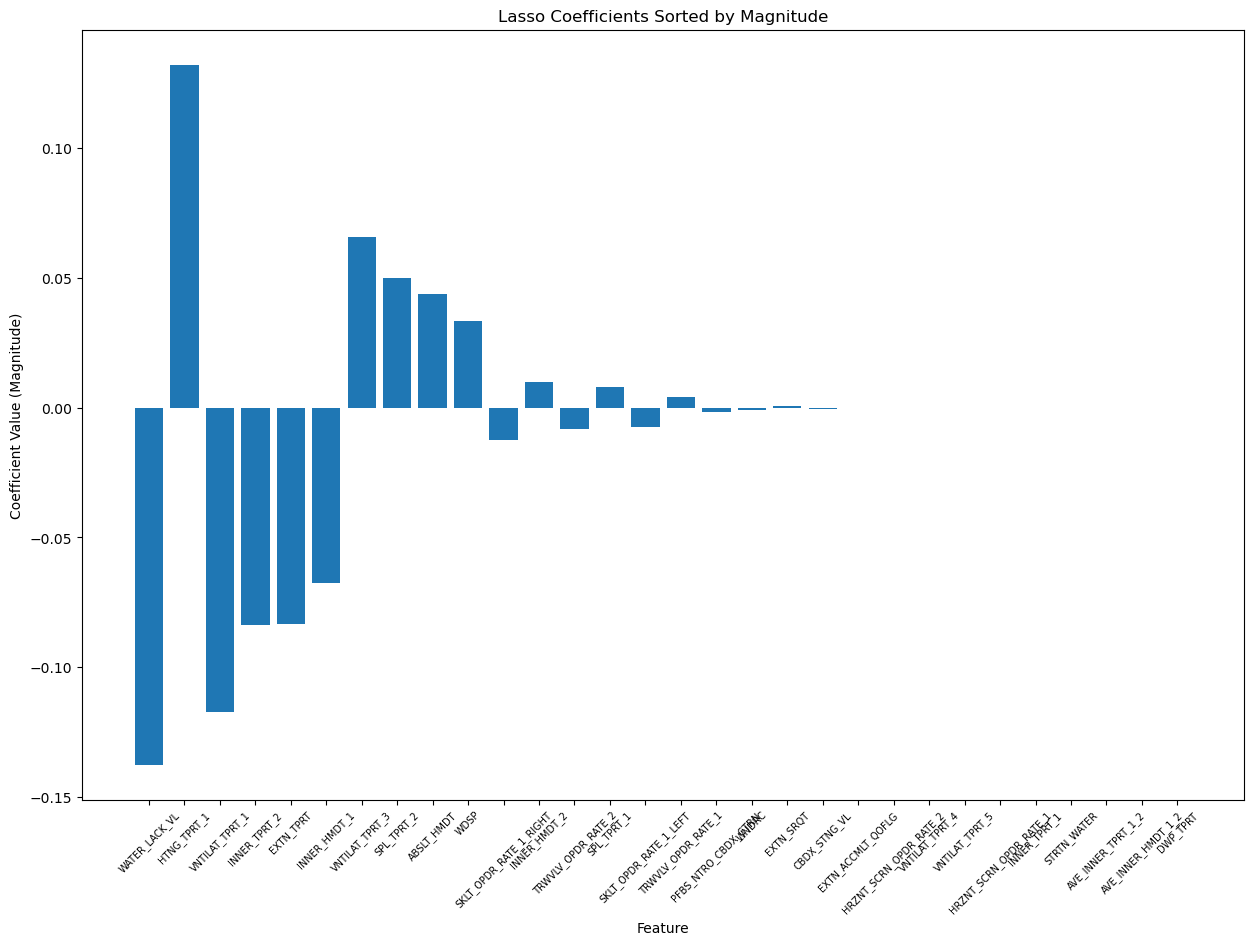

In [35]:
# 정렬된 계수와 변수명 가져오기
sorted_coefficients = coefficients[sorted_idx]
sorted_columns = names[sorted_idx]

# 시각화
plt.figure(figsize=(15, 10))
plt.bar(sorted_columns, sorted_coefficients)
plt.title('Lasso Coefficients Sorted by Magnitude')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value (Magnitude)')
plt.xticks(rotation=45, fontsize=7)
plt.show()

## 연속형 변수 일부만 사용

In [36]:
# 상관관계 보고 추린 필요한 변수들만 가져오기
berry_2= berry_0[["PFBS_NTRO_CBDX_CTRN","EXTN_TPRT","DWP_TPRT","ABSLT_HMDT","STRTN_WATER","WATER_LACK_VL","SPL_TPRT_1","HTNG_TPRT_1","CBDX_GNRT_OPRT_YN","SPL_TPRT_2","AVE_INNER_TPRT_1_2","AVE_INNER_HMDT_1_2","SKLT_OPDR_RATE_1_RIGHT","SKLT_OPDR_RATE_1_LEFT",'FRST_TREE_CNT']]
print (berry_2.head())

   PFBS_NTRO_CBDX_CTRN  EXTN_TPRT  DWP_TPRT  ABSLT_HMDT  STRTN_WATER  \
0                  456       -2.2       8.5         8.3          9.2   
1                  459       -2.2       9.0         8.6          9.4   
2                  468       -2.2       9.1         8.6          9.5   
3                  466       -2.3       9.2         8.7          9.4   
4                  467       -2.3       9.2         8.7          9.3   

   WATER_LACK_VL  SPL_TPRT_1  HTNG_TPRT_1  CBDX_GNRT_OPRT_YN  SPL_TPRT_2  \
0            0.9        30.6          9.0                  0        10.0   
1            0.8        37.2          9.0                  0        10.3   
2            0.9        34.8          9.0                  0        10.5   
3            0.7        33.6          9.0                  0        10.4   
4            0.6        33.4          9.0                  0        10.1   

   AVE_INNER_TPRT_1_2  AVE_INNER_HMDT_1_2  SKLT_OPDR_RATE_1_RIGHT  \
0                 8.9                92.0

In [37]:
x_1= berry_2.drop("FRST_TREE_CNT",axis=1).values
y= berry_2["FRST_TREE_CNT"].values
print(x_1)
print(y)

[[456.   -2.2   8.5 ...  92.    0.    0. ]
 [459.   -2.2   9.  ...  92.    0.    0. ]
 [468.   -2.2   9.1 ...  90.2   0.    0. ]
 ...
 [423.   24.9  24.1 ...  91.8  40.    0. ]
 [427.   24.6  24.  ...  92.2  40.    0. ]
 [431.   25.   24.1 ...  92.9  40.    0. ]]
[5.  5.  5.  ... 0.5 0.5 0.5]


In [38]:
names_1 =berry_2.drop("FRST_TREE_CNT",axis=1).columns

print(names_1)

Index(['PFBS_NTRO_CBDX_CTRN', 'EXTN_TPRT', 'DWP_TPRT', 'ABSLT_HMDT',
       'STRTN_WATER', 'WATER_LACK_VL', 'SPL_TPRT_1', 'HTNG_TPRT_1',
       'CBDX_GNRT_OPRT_YN', 'SPL_TPRT_2', 'AVE_INNER_TPRT_1_2',
       'AVE_INNER_HMDT_1_2', 'SKLT_OPDR_RATE_1_RIGHT',
       'SKLT_OPDR_RATE_1_LEFT'],
      dtype='object')


In [39]:
split_index = int(len(berry_2) * 0.8)
x_train_1 = x_1[:split_index]
x_test_1 = x_1[split_index:]

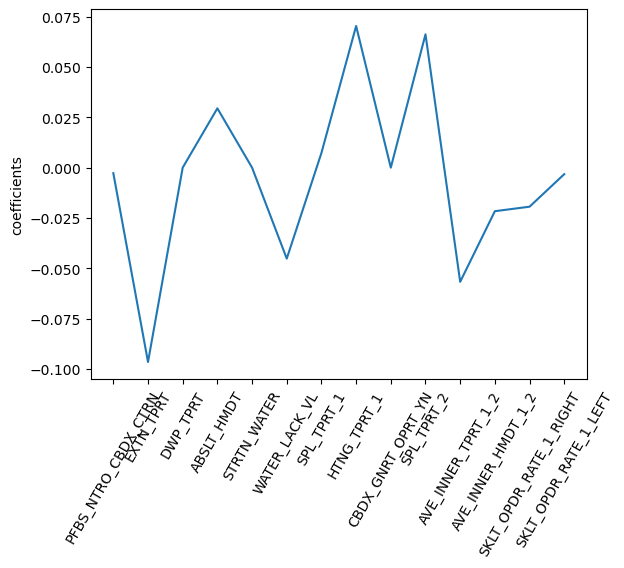

In [40]:
lasso_part= Lasso(alpha=0.1)
lasso_part_coef=lasso_part.fit(x_train_1,y_train).coef_

_=plt.plot(range(len(names_1)),lasso_part_coef)

_=plt.xticks(range(len(names_1)),names_1,rotation=60)

_=plt.ylabel("coefficients")

plt.show()

In [41]:
# 테스트 세트에 대한 예측
y_part_pred = lasso_part.predict(x_test_1)

# 평균 제곱 오차 계산
mse_1 = mean_squared_error(y_test, y_part_pred)
print("Mean Squared Error:", mse_1)

Mean Squared Error: 4.095353504073362


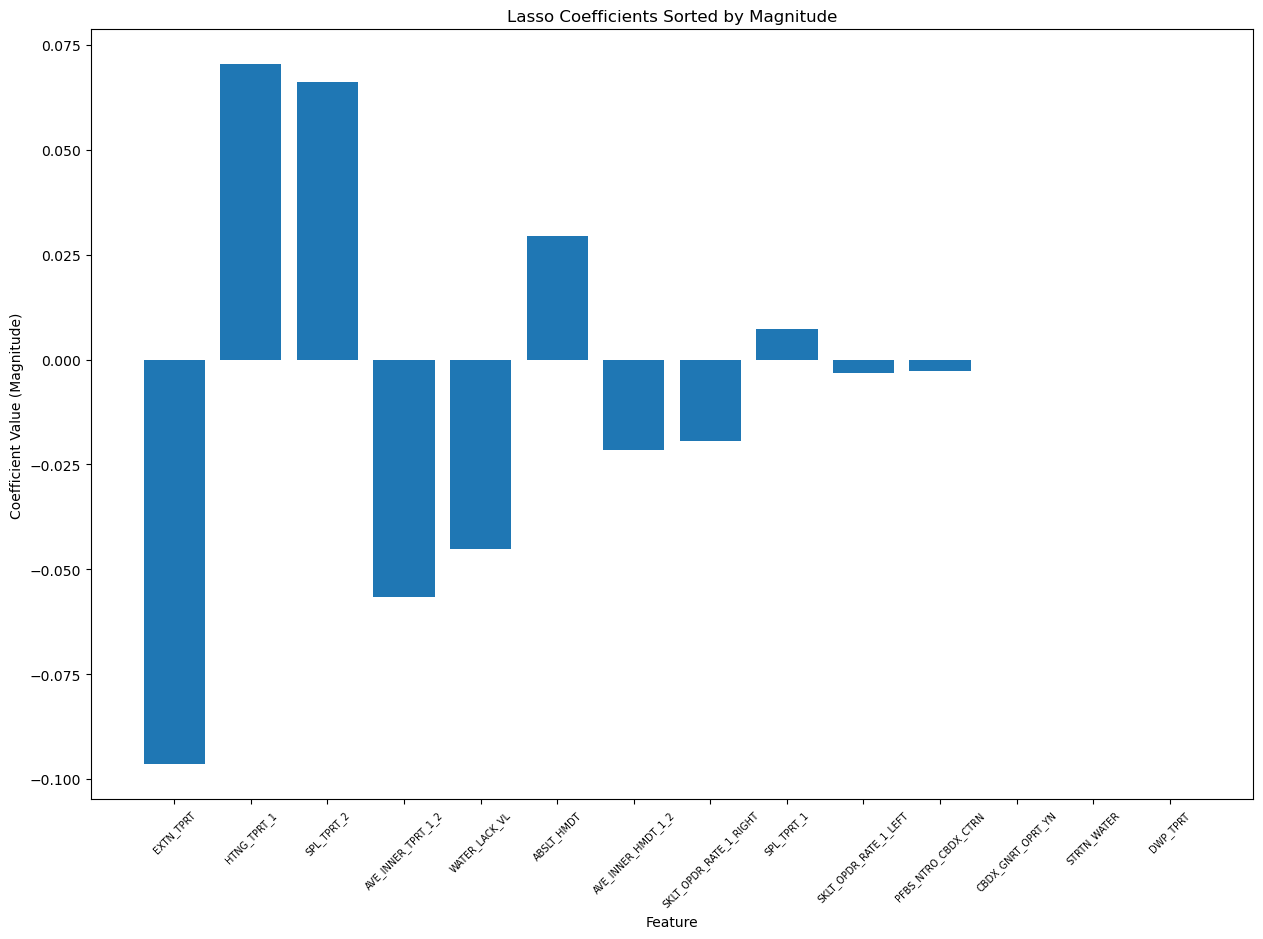

In [42]:
# 정렬된 계수와 변수명 가져오기
sorted_coefficients_1 = coefficients_1[sorted_idx_1]
sorted_columns_1 = names_1[sorted_idx_1]

# 시각화
plt.figure(figsize=(15, 10))
plt.bar(sorted_columns_1, sorted_coefficients_1)
plt.title('Lasso Coefficients Sorted by Magnitude')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value (Magnitude)')
plt.xticks(rotation=45, fontsize=7)
plt.show()

In [43]:
# Lasso 모델의 계수와 변수명 가져오기
coefficients_1 = lasso_part.coef_


# 계수 크기의 절댓값에 따라 정렬한 인덱스 가져오기
sorted_idx_1 = np.argsort(np.abs(coefficients_1))[::-1]

# 정렬된 계수와 변수명 출력
for i in sorted_idx_1:
    coef = coefficients_1[i]
    col_name = names_1[i]
    print(f"변수명: {col_name}, 계수: {coef}")

변수명: EXTN_TPRT, 계수: -0.096531310647782
변수명: HTNG_TPRT_1, 계수: 0.07035546004992645
변수명: SPL_TPRT_2, 계수: 0.06621924872400826
변수명: AVE_INNER_TPRT_1_2, 계수: -0.056711383759696365
변수명: WATER_LACK_VL, 계수: -0.04518589562683172
변수명: ABSLT_HMDT, 계수: 0.02946223468950808
변수명: AVE_INNER_HMDT_1_2, 계수: -0.02163519595590951
변수명: SKLT_OPDR_RATE_1_RIGHT, 계수: -0.01939844189766257
변수명: SPL_TPRT_1, 계수: 0.0073041120526591095
변수명: SKLT_OPDR_RATE_1_LEFT, 계수: -0.0032463882583387066
변수명: PFBS_NTRO_CBDX_CTRN, 계수: -0.002756382970620745
변수명: CBDX_GNRT_OPRT_YN, 계수: 0.0
변수명: STRTN_WATER, 계수: 0.0
변수명: DWP_TPRT, 계수: -0.0


# 결론적으로 중요하다고 나온 변수 : 
1. 온실 외부온도 
2. 온실 내에서 측정된 난방 온도
3. 온실 내부로 공급되는 온도
4. 두 온도계로 잰 온실 내부의 평균 온도
5. 온실 내부에서 부족한 수분의 양
6. 온실 내 절대습도
7. 두 온도계로 잰 온실 내부의 평균 습도
8.  일광과 환시를 조절하는데 사용되는 천창의 열림정도


In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [45]:
# 랜덤 포레스트 모델을 초기화
rf_model = RandomForestRegressor()

# 모델을 사용해 피쳐를 선택
sfm = SelectFromModel(estimator=rf_model, threshold="median")
X_train_transformed = sfm.fit_transform(x_train, y_train)
X_test_transformed = sfm.transform(x_test)  # test set을 변환

In [46]:
# 모델을 선택된 피쳐를 사용하여 학습
rf_model.fit(X_train_transformed, y_train)

# 테스트 세트에서 모델 평가
y_pred = rf_model.predict(X_test_transformed)

# 회귀 모델의 성능 평가 (MSE 사용)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.24859298748321504


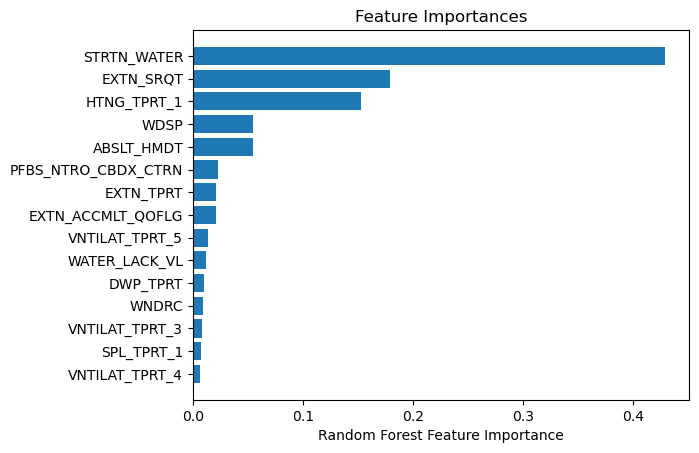

In [47]:
importances = rf_model.feature_importances_
idxs = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(idxs)), importances[idxs], align='center')
plt.yticks(range(len(idxs)), [names[i] for i in idxs])
plt.xlabel('Random Forest Feature Importance')
plt.show()

In [48]:
# 계수 크기의 절댓값에 따라 정렬한 인덱스 가져오기
sorted_idx = np.argsort(np.abs(importances))[::-1]

# 정렬된 계수와 변수명 출력
for i in sorted_idx:
    coef = importances[i]
    col_name = names[i]
    print(f"변수명: {col_name}, 계수: {coef}")

변수명: STRTN_WATER, 계수: 0.4295805991690673
변수명: EXTN_SRQT, 계수: 0.1787005373060546
변수명: HTNG_TPRT_1, 계수: 0.15286419002850127
변수명: WDSP, 계수: 0.054768230371506105
변수명: ABSLT_HMDT, 계수: 0.05444812644542241
변수명: PFBS_NTRO_CBDX_CTRN, 계수: 0.022873383835839096
변수명: EXTN_TPRT, 계수: 0.020849886395990364
변수명: EXTN_ACCMLT_QOFLG, 계수: 0.020414165616491616
변수명: VNTILAT_TPRT_5, 계수: 0.013483865899420452
변수명: WATER_LACK_VL, 계수: 0.011475973036530777
변수명: DWP_TPRT, 계수: 0.00975956764164006
변수명: WNDRC, 계수: 0.00909803280222151
변수명: VNTILAT_TPRT_3, 계수: 0.00832393376135452
변수명: SPL_TPRT_1, 계수: 0.007249033855647723
변수명: VNTILAT_TPRT_4, 계수: 0.006110473834312243


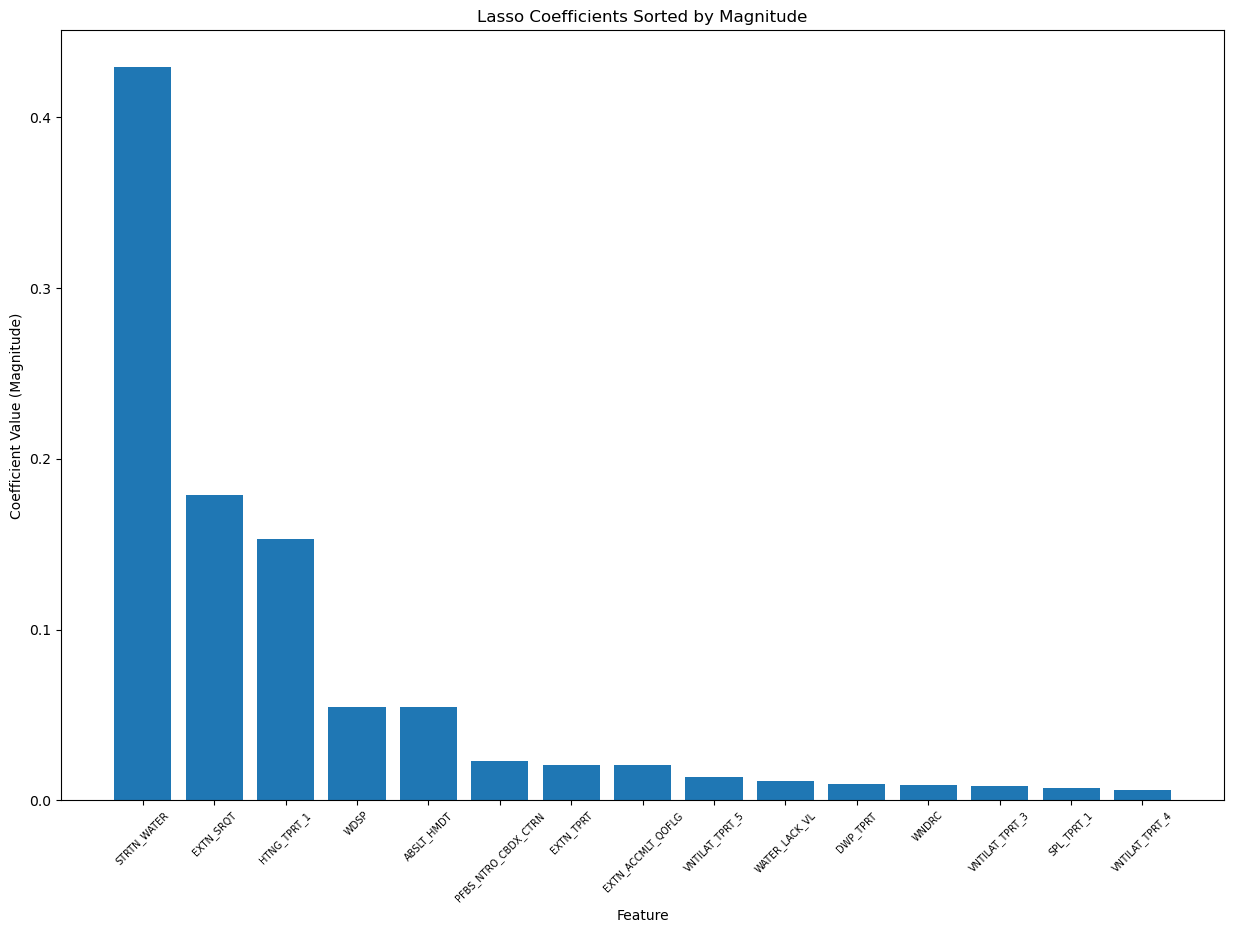

In [49]:
# 정렬된 계수와 변수명 가져오기
sorted_coefficients = importances[sorted_idx]
sorted_columns = names[sorted_idx]

# 시각화
plt.figure(figsize=(15, 10))
plt.bar(sorted_columns, sorted_coefficients)
plt.title('Lasso Coefficients Sorted by Magnitude')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value (Magnitude)')
plt.xticks(rotation=45, fontsize=7)
plt.show()

In [50]:
# 연속형 변수 일부


In [51]:
# 랜덤 포레스트 모델을 초기화
rf_part_model = RandomForestRegressor()

# 모델을 사용해 피쳐를 선택
sfm = SelectFromModel(estimator=rf_part_model, threshold="median")
X_train_1_transformed = sfm.fit_transform(x_train_1, y_train)
X_test_1_transformed = sfm.transform(x_test_1)  # test set을 변환

In [52]:
# 모델을 선택된 피쳐를 사용하여 학습
rf_part_model.fit(X_train_1_transformed, y_train)

# 테스트 세트에서 모델 평가
y_pred = rf_part_model.predict(X_test_1_transformed)

# 회귀 모델의 성능 평가 (MSE 사용)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.4489177423028967


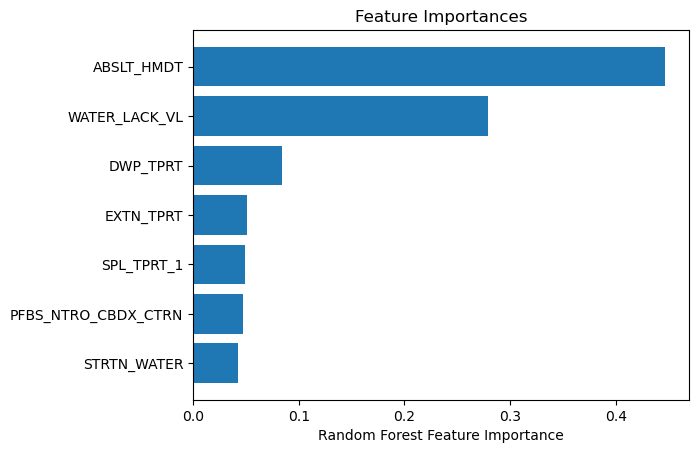

In [53]:
importances = rf_part_model.feature_importances_
idxs = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(idxs)), importances[idxs], align='center')
plt.yticks(range(len(idxs)), [names_1[i] for i in idxs])
plt.xlabel('Random Forest Feature Importance')
plt.show()

In [54]:
# 계수 크기의 절댓값에 따라 정렬한 인덱스 가져오기
sorted_idx = np.argsort(np.abs(importances))[::-1]

# 정렬된 계수와 변수명 출력
for i in sorted_idx:
    coef = importances[i]
    col_name = names_1[i]
    print(f"변수명: {col_name}, 계수: {coef}")

변수명: ABSLT_HMDT, 계수: 0.44712040027841793
변수명: WATER_LACK_VL, 계수: 0.27878379630509315
변수명: DWP_TPRT, 계수: 0.0837773849083772
변수명: EXTN_TPRT, 계수: 0.050859440969628994
변수명: SPL_TPRT_1, 계수: 0.04946386466873705
변수명: PFBS_NTRO_CBDX_CTRN, 계수: 0.04736616817709307
변수명: STRTN_WATER, 계수: 0.04262894469265249


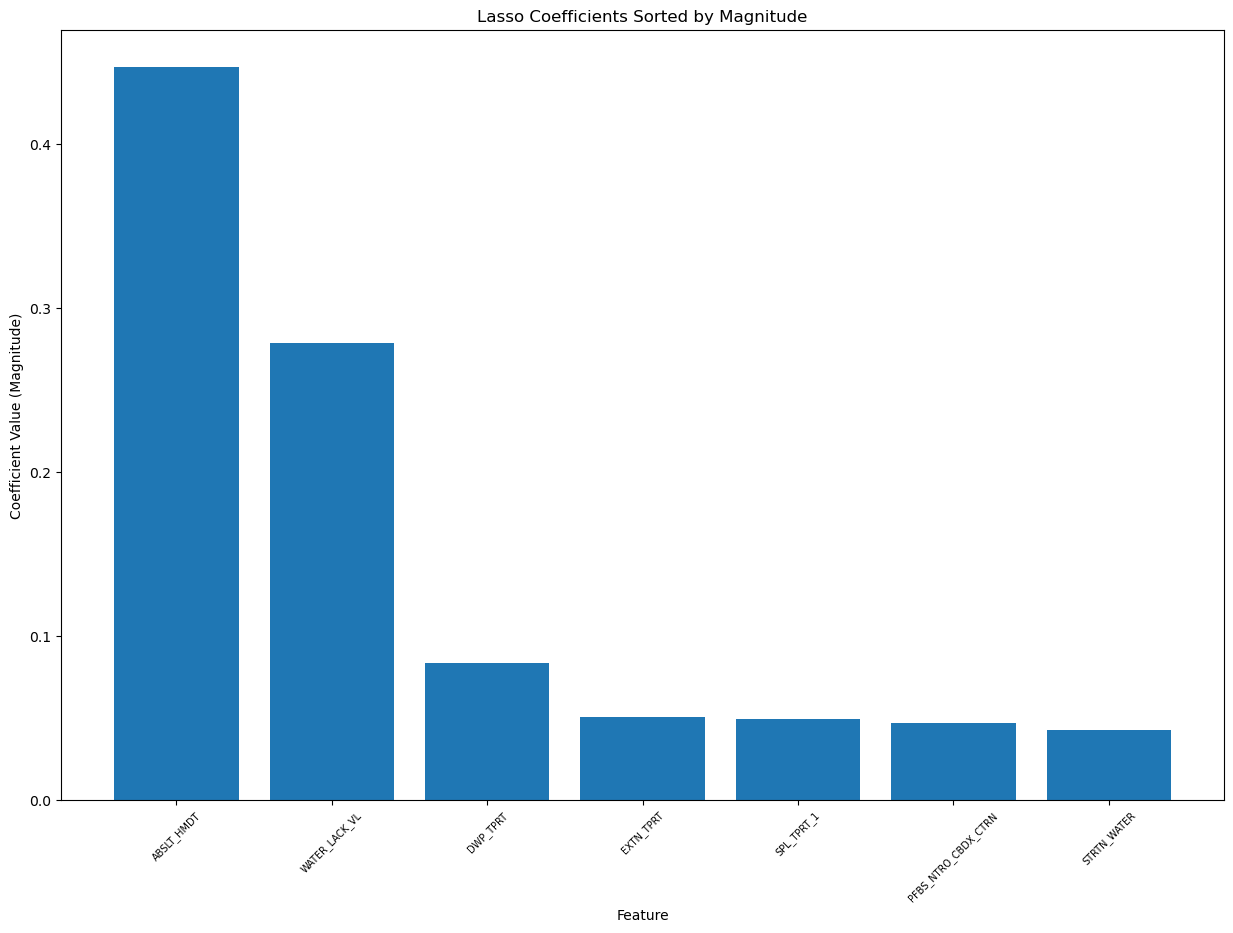

In [55]:
# 정렬된 계수와 변수명 가져오기
sorted_coefficients = importances[sorted_idx]
sorted_columns = names_1[sorted_idx]

# 시각화
plt.figure(figsize=(15, 10))
plt.bar(sorted_columns, sorted_coefficients)
plt.title('Lasso Coefficients Sorted by Magnitude')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value (Magnitude)')
plt.xticks(rotation=45, fontsize=7)
plt.show()